In [2]:
import numpy as np

In [3]:
def haversine(lon1, lat1, lon2, lat2):
    r = 6371 

    lon1_rad = np.radians(lon1)
    lat1_rad = np.radians(lat1)
    lon2_rad = np.radians(lon2)
    lat2_rad = np.radians(lat2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = r * c

    return distance

In [4]:
def t_advection(mlt, mlu, mlv, lon, lat):
    # Description - advection term of heat budget
    # input
    # mlt - 3D daily mixed-layer temperature data to calculate advection term of heat budget, specified as a
    #   three dimensions matrix m-by-n-by-t. m and n separately indicate two spatial dimensions
    #   and t indicates temporal dimension.
    # mlu - 3D daily mixed-layer zonal velocity data to calculate advection term of heat budget, specified as a
    #   three dimensions matrix m-by-n-by-t. m and n separately indicate two spatial dimensions
    #   and t indicates temporal dimension.
    # mlv - 3D daily mixed-layer meridional velocity data to calculate advection term of heat budget, specified as a
    #   three dimensions matrix m-by-n-by-t. m and n separately indicate two spatial dimensions
    #   and t indicates temporal dimension.
    # mlt & mlu & mlv must have the same dimensions.
    # lon - A vector, longitude range of temperatures and horizontal velocity
    # lat - A vector, latitude range of temperatures and horizontal velocity
    # output
    # adv - horizontal advection term of heat budget
    # advu - zonal advection term of heat budget
    # advv - meridional advection term of budget

    nx, ny, nt = mlt.shape

    # Calculate grid spacing
    dx = np.zeros((nx, ny, nt))
    for j in range(len(lat)):
        for i in range(1, len(lon) - 1):
            dx[i, j, :] = haversine(lon[i-1], lat[j], lon[i+1], lat[j]) * 1e3
    dx[0, :, :] = dx[1, :, :]
    dx[-1, :, :] = dx[-2, :, :]
    dy = haversine(lon[0], lat[0], lon[0], lat[1]) * 1000 * 2

    # Calculate advection terms
    advu0 = np.full((nx, ny, nt), np.nan)  # unit: °C/day
    advv0 = np.full((nx, ny, nt), np.nan)  # unit: °C/day
    advu0[1:-1, 1:-1, :] = -(mlu[1:-1, 1:-1, :] * (mlt[2:, 1:-1, :] - mlt[:-2, 1:-1, :]) / dx[1:-1, 1:-1, :]) * 3600 * 24
    advv0[1:-1, 1:-1, :] = -(mlv[1:-1, 1:-1, :] * (mlt[1:-1, 2:, :] - mlt[1:-1, :-2, :]) / dy) * 3600 * 24

    advu = (advu0[:, :, :-1] + advu0[:, :, 1:]) / 2
    advv = (advv0[:, :, :-1] + advv0[:, :, 1:]) / 2
    adv = advu + advv

    return adv, advu, advv

In [5]:
nx, ny, nt = 241, 241, 10227

lon = np.linspace(105, 125.1, nx)
lat = np.linspace(5, 25.1, ny)

In [6]:
mlt = np.load('./south_93_20_temp_surface.npz')['temp']
mlu = np.load('./south_93_20_u_surface.npz')['u']
mlv = np.load('./south_93_20_v_surface.npz')['v']

In [7]:
mlt = np.where(mlt<-100, np.nan, mlt)
mlt.shape

(10227, 241, 241)

In [8]:
type(mlt)

numpy.ndarray

In [9]:
mlu = np.where(mlu<-100, np.nan, mlu)
mlv = np.where(mlv<-100, np.nan, mlv)

In [10]:
mlt1 = mlt.transpose(1,2,0)
mlu1 = mlu.transpose(1,2,0)
mlv1 = mlv.transpose(1,2,0)
mlt1.shape

(241, 241, 10227)

In [11]:
adv, advu, advv = t_advection(mlt1, mlu1, mlv1, lon, lat)

In [12]:
adv[adv == -np.inf] = np.nan
adv[adv == np.inf] = np.nan

In [13]:
adv[:,:,3000:3500]

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.03163333, -0.05061378, -0.04611818, ...,  0.02243789,
          0.01230466,  0.01532674],
        [-0.02879834, -0.04290513, -0.03712976, ...,  0.01936597,
          0.01430228,  0.0203551 ],
        ...,
        [ 1.06003833,  0.2150789 , -0.70743838, ..., -

In [14]:
advu[363:364]

array([], shape=(0, 241, 10226), dtype=float64)

In [15]:
adv.shape

(241, 241, 10226)

In [16]:
adv = adv.transpose(2,0,1)
adv.shape

(10226, 241, 241)

In [17]:
adv1 = adv[1281:1297]
adv2 = adv[1743:1750]
adv3 = adv[1755:1762]
adv4 = adv[1788:1805]
adv5 = adv[1819:1851]
adv6 = adv[1867:1929]
adv7 = adv[1945:1950]
adv8 = adv[1955:1971]
adv9 = adv[1987:2004]
adv10 = adv[2019:2118]
adv11 = adv[2133:2150]
adv12 = adv[2158:2169]
adv13 = adv[2179:2227]
adv14 = adv[2267:2279]
adv15 = adv[2298:2303]
adv16 = adv[2566:2571]
adv17 = adv[2668:2683]
adv18 = adv[2941:2950]
adv19 = adv[2953:2959]
adv20 = adv[3000:3008]
adv21 = adv[3014:3024]
adv22 = adv[3028:3036]
adv23 = adv[3039:3053]
adv24 = adv[3220:3225]
adv25 = adv[3228:3233]
adv26 = adv[3418:3428]
adv27 = adv[3461:3471]
adv28 = adv[3584:3595]
adv29 = adv[3604:3609]
adv30 = adv[3625:3630]
adv31 = adv[3635:3657]
adv32 = adv[4517:4522]
adv33 = adv[4575:4581]
adv34 = adv[4695:4703]
adv35 = adv[4873:4879]
adv36 = adv[5069:5093]
adv37 = adv[5163:5169]
adv38 = adv[5266:5292]
adv39 = adv[5314:5328]
adv40 = adv[5769:5793]
adv41 = adv[5898:5903]
adv42 = adv[5906:5912]
adv43 = adv[5923:5928]
adv44 = adv[6240:6254]
adv45 = adv[6263:6277]
adv46 = adv[6345:6361]
adv47 = adv[6370:6413]
adv48 = adv[6422:6450]
adv49 = adv[6472:6501]
adv50 = adv[7002:7008]
adv51 = adv[7015:7022]
adv52 = adv[7044:7076]
adv53 = adv[7264:7305]
adv54 = adv[7309:7314]
adv55 = adv[7385:7401]
adv56 = adv[7432:7477]
adv57 = adv[7494:7499]
adv58 = adv[7784:7795]
adv59 = adv[7799:7835]
adv60 = adv[7851:7860]
adv61 = adv[7901:7909]
adv62 = adv[7912:7917]
adv63 = adv[7998:8011]
adv64 = adv[8161:8210]
adv65 = adv[8243:8253]
adv66 = adv[8260:8268]
adv67 = adv[8278:8324]
adv68 = adv[8342:8431]
adv69 = adv[8512:8592]
adv70 = adv[8595:8626]
adv71 = adv[8636:8648]
adv72 = adv[8719:8762]
adv73 = adv[8769:8788]
adv74 = adv[8893:8900]
adv75 = adv[8988:9000]
adv76 = adv[9029:9057]
adv77 = adv[9086:9108]
adv78 = adv[9191:9196]
adv79 = adv[9266:9288]
adv80 = adv[9465:9514]
adv81 = adv[9544:9549]
adv82 = adv[9553:9566]
adv83 = adv[9591:9618]
adv84 = adv[9629:9677]
adv85 = adv[9770:9783]
adv86 = adv[9789:9807]
adv87 = adv[9867:9877]
adv88 = adv[9885:9891]
adv89 = adv[9940:9957]
adv90 = adv[9987:10154]
adv91 = adv[10188:10195]
adv92 = adv[10210:10215]

In [18]:
adv1

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, -0.02195054, -0.02096433, ...,  1.01993165,
          1.19933636,         nan],
        [        nan, -0.01031335, -0.02216576, ...,  1.32985124,
          1.21732759,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.05004215,
         -0.19207504,         nan],
        [        nan,         nan,         nan, ..., -0.06576455,
         -0.09543614,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, -0.02438807, -0.02314856, ...,  0.4737265 ,
          1.23612987,         nan],
        [        nan, -0.00995527, -0.00828423, ...,  0.60029814,
          0.24079305,         nan],
        ...,
        [        nan,         nan,         nan, ..., -

In [19]:
shallow_adv = np.concatenate((adv15,adv16,adv18,adv21,
                              adv41,adv42,adv43,adv50,adv51,adv52,adv55,adv83))

Subsurface_reversed_adv = np.concatenate((adv1,adv2,adv4,adv5,adv8,adv17,adv22,adv23,
                                         adv26,adv27,adv29,adv30,adv32,adv33,adv34,adv35,adv36,adv37,
                                         adv38,adv39,adv44,adv45,adv46,adv58,adv59,adv60,adv61,
                                         adv62,adv64,adv65,adv66,adv67,adv69,adv70,adv71,adv74,adv78,adv79,
                                         adv85,adv87,adv88,adv89))

Subsurface_intensified_adv = np.concatenate((adv10, adv11, adv12, adv13, adv14, adv19,adv20,
                                             adv24,adv25,adv40,
                                            adv47, adv48, adv49, adv53,
                                             adv54,adv56,adv57,adv72,
                                             adv73,adv76,adv77,adv80,adv81,adv82,adv84,adv90,adv91,adv92))

Deep_adv = adv75


Subsurface_intensified_Reversed_adv = np.concatenate((adv3,adv6,adv7,adv9,adv28,adv31,adv63,
                                                     adv68, adv86))

In [20]:
shallow_adv_mean = np.nanmean(shallow_adv, axis = 0)
Subsurface_reversed_adv_mean = np.nanmean(Subsurface_reversed_adv, axis = 0)
Subsurface_intensified_adv_mean = np.nanmean(Subsurface_intensified_adv, axis = 0)
Deep_adv_mean = np.nanmean(Deep_adv, axis = 0)
Subsurface_intensified_Reversed_adv_mean = np.nanmean(Subsurface_intensified_Reversed_adv, axis = 0)

C:\Users\mymylove\AppData\Local\Temp/ipykernel_27372/2143683220.py:1: RuntimeWarning: Mean of empty slice
  shallow_adv_mean = np.nanmean(shallow_adv, axis = 0)
C:\Users\mymylove\AppData\Local\Temp/ipykernel_27372/2143683220.py:2: RuntimeWarning: Mean of empty slice
  Subsurface_reversed_adv_mean = np.nanmean(Subsurface_reversed_adv, axis = 0)
C:\Users\mymylove\AppData\Local\Temp/ipykernel_27372/2143683220.py:3: RuntimeWarning: Mean of empty slice
  Subsurface_intensified_adv_mean = np.nanmean(Subsurface_intensified_adv, axis = 0)
C:\Users\mymylove\AppData\Local\Temp/ipykernel_27372/2143683220.py:4: RuntimeWarning: Mean of empty slice
  Deep_adv_mean = np.nanmean(Deep_adv, axis = 0)
C:\Users\mymylove\AppData\Local\Temp/ipykernel_27372/2143683220.py:5: RuntimeWarning: Mean of empty slice
  Subsurface_intensified_Reversed_adv_mean = np.nanmean(Subsurface_intensified_Reversed_adv, axis = 0)


In [21]:
shallow_adv_mean.shape

(241, 241)

In [22]:
list3 = []
for i in range(241):
    for j in range(241):
        list3.append(shallow_adv_mean[-i-1, j])

shallow_adv_mean0 = np.array(list3)
shallow_adv_mean0 = shallow_adv_mean0.reshape(241,241)

list4 = []
for i in range(241):
    for j in range(241):
        list4.append(Subsurface_reversed_adv_mean[-i-1, j])

Subsurface_reversed_adv_mean0 = np.array(list4)
Subsurface_reversed_adv_mean0 = Subsurface_reversed_adv_mean0.reshape(241,241)


list5 = []
for i in range(241):
    for j in range(241):
        list5.append(Subsurface_intensified_adv_mean[-i-1, j])

Subsurface_intensified_adv_mean0 = np.array(list5)
Subsurface_intensified_adv_mean0 = Subsurface_intensified_adv_mean0.reshape(241,241)

list6 = []
for i in range(241):
    for j in range(241):
        list6.append(Deep_adv_mean[-i-1, j])

Deep_adv_mean0 = np.array(list6)
Deep_adv_mean0 = Deep_adv_mean0.reshape(241,241)


list8 = []
for i in range(241):
    for j in range(241):
        list8.append(Subsurface_intensified_Reversed_adv_mean[-i-1, j])

Subsurface_intensified_Reversed_adv_mean0 = np.array(list8)
Subsurface_intensified_Reversed_adv_mean0 = Subsurface_intensified_Reversed_adv_mean0.reshape(241,241)

In [24]:
Subsurface_intensified_Reversed_adv_mean0.shape

(241, 241)

In [25]:
np.savez('./Tt.npz',
        Shallow_sf_mean = shallow_adv_mean0, 
         Subsurface_reversed_sf_mean  = Subsurface_reversed_adv_mean0,
        Subsurface_intensified_sf_mean = Subsurface_intensified_adv_mean0, 
         Deep_sf_mean = Deep_adv_mean0,
        Subsurface_intensified_Reversed_sf_mean = Subsurface_intensified_Reversed_adv_mean0)

In [43]:
np.nanmax(Deep_adv_mean)

5.5389288628686275

In [44]:
np.nanmean(Subsurface_reversed_adv_mean)

-0.001141122385646729

In [45]:
np.nanmean(Subsurface_intensified_Reversed_adv_mean0)

-0.016633740710038123

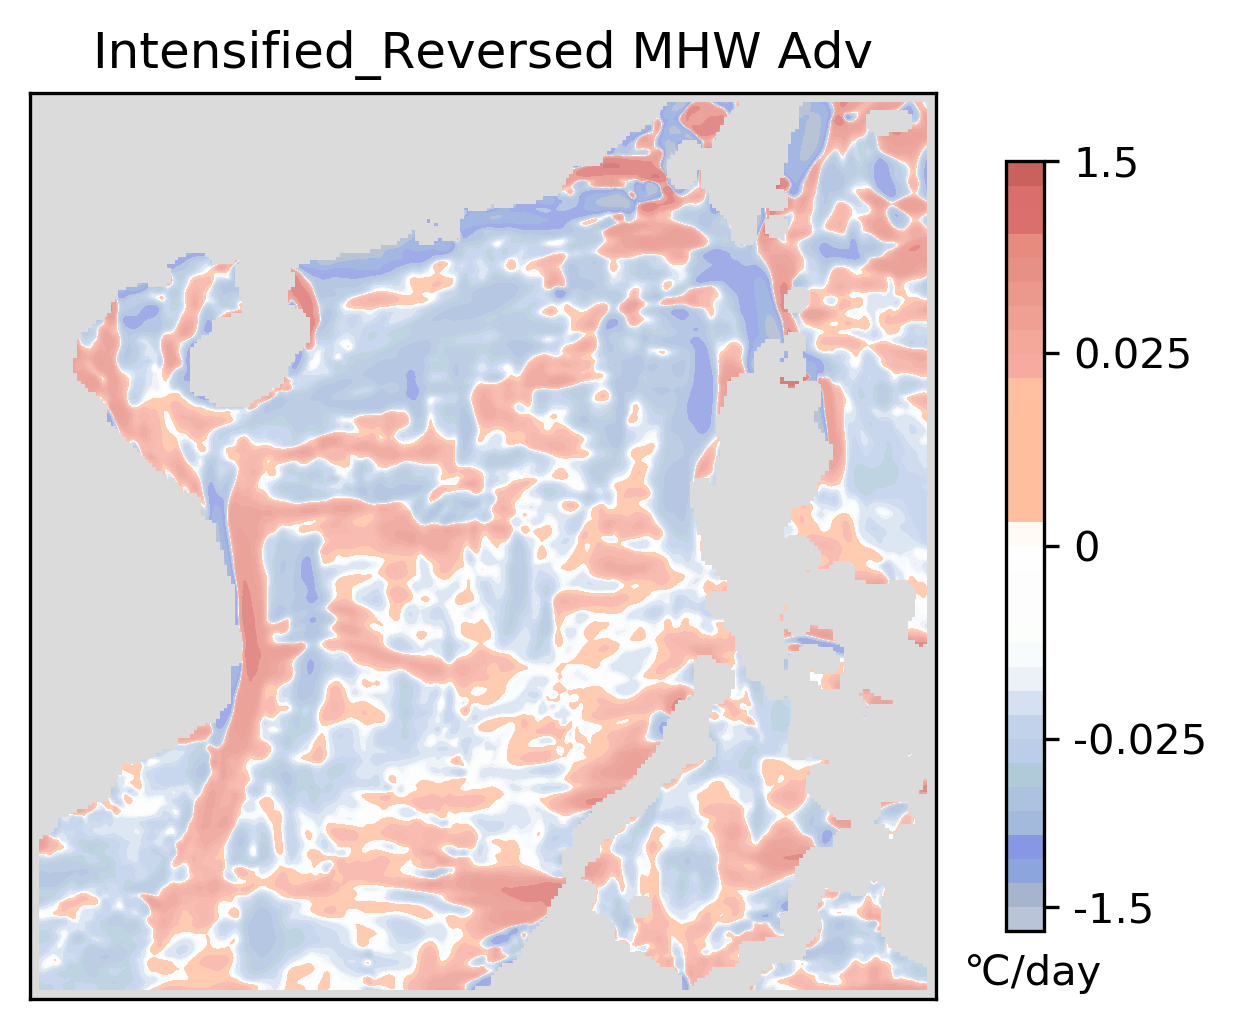

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = Subsurface_intensified_Reversed_adv_mean0

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([-3, -1.5, -0.5, -0.25, -0.125, -0.075, -0.05, -0.0375, -0.025, -0.0185, -0.01,
                     -0.0075, -0.005, -0.00375, -0.0025, -0.00125, 0, 0.00125,
                     0.0025, 0.00375, 0.005, 0.00075, 0.01, 0.0125, 0.025, 0.0375, 0.05, 0.075, 0.125,
                     0.25, 0.5, 1, 1.5], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(data, cmap=cmap_custom, norm=norm, interpolation='bicubic', alpha=0.8)

# Add the color bar with the custom color map

cbar = plt.colorbar(sm, shrink=0.85)
cbar.set_ticks([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom ticks
cbar.set_ticklabels([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom tick labels

# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E']) 
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N']) 
plt.xticks([])
plt.yticks([])

plt.title('Intensified_Reversed MHW Adv')

cbar.set_label('℃/day', rotation=0, labelpad=-40)  # 添加单位
cbar.ax.yaxis.set_label_coords(0.7, -0.03)

plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()